In [1]:
! ls -l /g/data/w97/ad9701/drought_2017to2020/PminusPET/SPEI3_baseline_198101_202005/

total 5982236
-rwxr-xr-x. 1 ad9701 w97 1499988336 Mar 23  2022 SPEI3_awra_monthly_1981_2020_set1.nc
-rwxr-xr-x. 1 ad9701 w97 1503559704 Mar 23  2022 SPEI3_awra_monthly_1981_2020_set2.nc
-rwxr-xr-x. 1 ad9701 w97 1504400024 Mar 23  2022 SPEI3_awra_monthly_1981_2020_set3.nc
-rwxr-xr-x. 1 ad9701 w97 1507981896 Mar 23  2022 SPEI3_awra_monthly_1981_2020_set4.nc
-rwxr-xr-x. 1 ad9701 w97   89936640 Mar 23  2022 SPEI3_gleam_monthly_1981_2020.nc
-rw-r--r--. 1 ad9701 w97    5160083 Mar 31  2022 spei_list_dry_byyear.pickle
-rw-r--r--. 1 ad9701 w97    5160257 Mar 31  2022 spei_list_dry_JJAS_byyear.pickle
-rw-r--r--. 1 ad9701 w97    4789916 Mar 31  2022 spei_list_dry_JJAS.pickle
-rw-r--r--. 1 ad9701 w97    4789547 Mar 31  2022 spei_list_dry.pickle


In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
%run -i Tinderbox_drought/drought_metrics/dataInfo_and_functions.py

In [3]:
data_dir = '/g/data/w97/ad9701/drought_2017to2020/PminusPET/SPEI3_baseline_198001_201612/'

fig_dir = 'figures/drought_2017to2020/PminusPET/baseline_198001_201612/'
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir) 

figname_prefix = 'spei_3m'
fname_prefix = 'SPEI3'
vname = 'SPEI3'

time_slice = slice('2017-01-01', '2020-12-31')

filename = glob.glob(data_dir + vname + '_awra_monthly*.nc')
ds_awra = xr.open_mfdataset(filename)
ds_awra = ds_awra.sel(time = time_slice)

filename = glob.glob(data_dir + vname + '_gleam_monthly*.nc')[0]
ds_gleam = xr.open_dataset(filename)
ds_gleam = ds_gleam.sel(time = time_slice)

data_name = ['awra', 'gleam']
data_name_title = ['AWRA & AGCD', 'GLEAM & MSWEP']
dname_dict = dict(zip(data_name, data_name_title))
mask_file_dict = {data_name[0]: '/g/data/w97/ad9701/drought_2017to2020/precip_data/agcd_land_mask.nc',
                  data_name[1]: '/g/data/w97/ad9701/drought_2017to2020/PminusPET/gleam_land_mask.nc'}                
mask_list = []
for d in data_name:
    ds_mask = xr.open_dataset(mask_file_dict[d])
    mask_list.append(ds_mask)
mask_dict = dict(zip(data_name, mask_list))

In [4]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/array/core.py:456: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in add
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in add
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in add
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning:

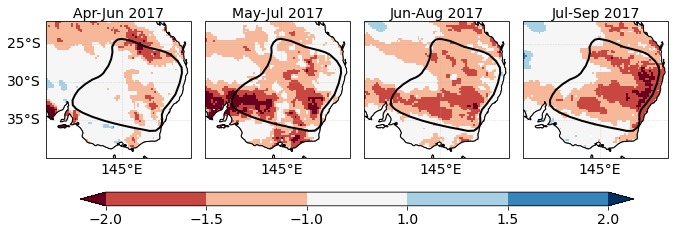

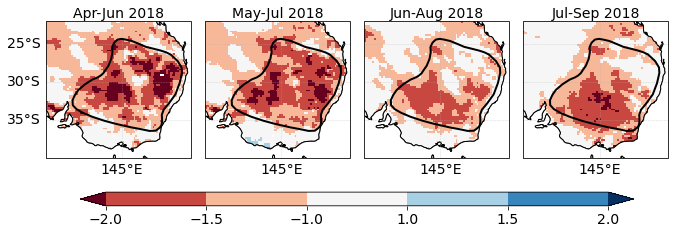

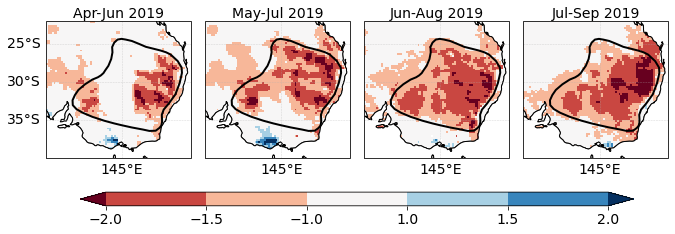

In [5]:
# GLEAM is at the coarest resolution; regrid AWRA to the GLEAM grid

da_awra_reg = regrid_all_from_list([ds_awra['SPEI3']], lat = ds_gleam.lat.values, lon = ds_gleam.lon.values)

# plot mean SPEI3
cmap = 'RdBu'
levels = [-2, -1.5, -1, 1, 1.5, 2]

out_dir = 'figures/drought_2017to2020/PminusPET/baseline_198001_201612/'
sh_file = '/g/data/w97/ad9701/drought_2017to2020/drought_focusArea/smooth_polygon_drought_focusArea.shp'

lat_slice = slice(-40, -20)
lat_slice_rev = slice(-20, -40)
lon_slice = slice(135, 154)

monName_list = ['Apr-Jun', 'May-Jul', 'Jun-Aug', 'Jul-Sep']

for yrStr in ['2017', '2018', '2019']:
    time_slice = slice(yrStr + '-06-01', yrStr + '-09-30')
    
    da_sel_list = []
    for da in [da_awra_reg[0], ds_gleam['SPEI3']]:
        da_temp = da.sel(time = time_slice, lat = lat_slice_rev, lon = lon_slice)
        time_arr = da_temp.time.values.astype('datetime64[M]')
        da_temp = da_temp.assign_coords({'time':time_arr})
        da_sel_list.append(da_temp)
        del da_temp
        
    subplot_title = [x + ' ' + yrStr for x in monName_list]    
    da_avg = (da_sel_list[0] + da_sel_list[1])/2
    out_figname = 'spei3_dataMean_' + yrStr + '.png'
    plot_list = [da_avg.isel(time = i) for i in range(4)]
    plot_obj = draw_pcolormesh_Npanels(plot_list, cmap = cmap, ncols = 4, nrows = 1, panel_width=2.4, panel_height=3.8, levels=levels, 
                                       shapefile = sh_file, shapefile_color = 'black', subplot_title = subplot_title,
                                       cbar_label='', longer_cbar = True, thicker_cbar=True,
                                       out_dir = out_dir, out_figname = out_figname, fig_dpi = 600)